In [1]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from scipy.stats.stats import ttest_ind
from matplotlib import pyplot as plt
from magicbox.stats import EffectSize
from cxy_hcp_ffa.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis/s2/1080_fROI/refined_with_Kevin')
calc_dir = pjoin(anal_dir, 'NI_R2')
work_dir = pjoin(calc_dir, 'plot')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# Plot BOLD CNR

#subject of pFus: 2038
#subject of mFus: 2078
Ttest_indResult(statistic=26.615238744361672, pvalue=3.8479468771119845e-144)
CohenD: 0.8297422178246002


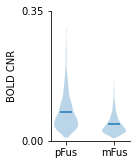

In [2]:
ylims = (0, 0.35)
fname = 'individual-FFA_BOLD-CNR'
figsize = (2, 2.4)
cnr_file = pjoin(calc_dir, f'CNR/{fname}.pkl')
ylabel = 'BOLD CNR'
Hemis = ('L', 'R')
roi_names = ('pFus', 'mFus')
out_file = pjoin(work_dir, f'{fname}.svg')
# out_file = 'show'

es = EffectSize()
cnr_dict = pkl.load(open(cnr_file, 'rb'))
n_roi = len(roi_names)
x = np.arange(1, n_roi + 1)
data_points = []
fig, ax = plt.subplots(figsize=figsize)
for roi_name in roi_names:
    data_points_tmp = []
    for Hemi in Hemis:
        data = cnr_dict[f'{Hemi}_{roi_name}']
        data_points_tmp.extend(data[~np.isnan(data)])
    data_points.append(data_points_tmp)
    print(f'#subject of {roi_name}:', len(data_points_tmp))
print(ttest_ind(*data_points))
print(f'CohenD: {es.cohen_d(*data_points)}')
ax.violinplot(data_points, x, showmeans=True, showextrema=False)
ax.set_xticks(x)
ax.set_xticklabels(roi_names)
ax.set_ylabel(ylabel)
ax.set_ylim(*ylims)
ax.set_yticks(ylims)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# Plot zstat corr beta

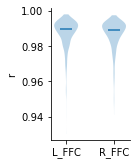

In [2]:
figsize = (2, 2.4)
fname = 'corr_in_FFC'
roi_names = ('L_FFC', 'R_FFC')
fpath = pjoin(calc_dir, f'zstat_corr_beta/{fname}.pkl')
out_file = pjoin(work_dir, f'{fname}.svg')
# out_file = 'show'

n_roi = len(roi_names)
x = np.arange(1, n_roi + 1)
data = pkl.load(open(fpath, 'rb'))
datasets = []
fig, ax = plt.subplots(figsize=figsize)
for roi in roi_names:
    datasets.append(data[roi][~np.isnan(data[roi])])
# ax.violinplot(datasets, x, showmeans=True, showextrema=False)
ax.violinplot(datasets, x, showmedians=True, showextrema=False)
ax.set_xticks(x)
ax.set_xticklabels(roi_names)
ax.set_ylabel('r')
# ax.set_ylim(*ylims)
# ax.set_yticks(ylims)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)